
### Project - using Python for statistics and visualisation

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
dataset = iris['data']

In [4]:
target = iris['target']

In [5]:
df = pd.DataFrame(np.c_[dataset, target], columns=iris['feature_names'] + ['species'])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
111,6.4,2.7,5.3,1.9,2.0
93,5.0,2.3,3.3,1.0,1.0
35,5.0,3.2,1.2,0.2,0.0
23,5.1,3.3,1.7,0.5,0.0
144,6.7,3.3,5.7,2.5,2.0


In [89]:
df.shape

(150, 5)

In [6]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [8]:
range_ = {}
for col in df:
    range_[col] = df[col].max() - df[col].min()
pd.Series(range_)

sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
species              2.0
dtype: float64

In [9]:
df.agg(['mean','var', 'min','max'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
mean,5.843333,3.057333,3.758000,1.199333,1.000000
var,0.685694,0.189979,3.116278,0.581006,0.671141
min,4.300000,2.000000,1.000000,0.100000,0.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Seaborn Visualisation

In [10]:
import seaborn as sns

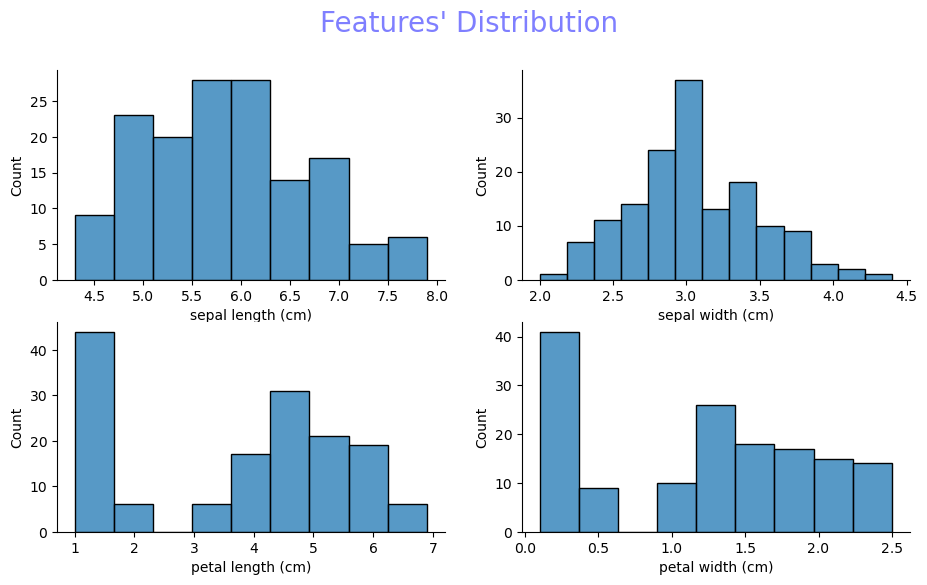

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle("Features' Distribution",fontsize=20,color='b',alpha=0.5)
sns.histplot(ax=axs[0, 0], data=df, x='sepal length (cm)')
sns.histplot(ax=axs[0, 1], data=df, x='sepal width (cm)')
sns.histplot(ax=axs[1, 0], data=df, x='petal length (cm)')
sns.histplot(ax=axs[1, 1], data=df, x='petal width (cm)')
sns.despine()
plt.show()

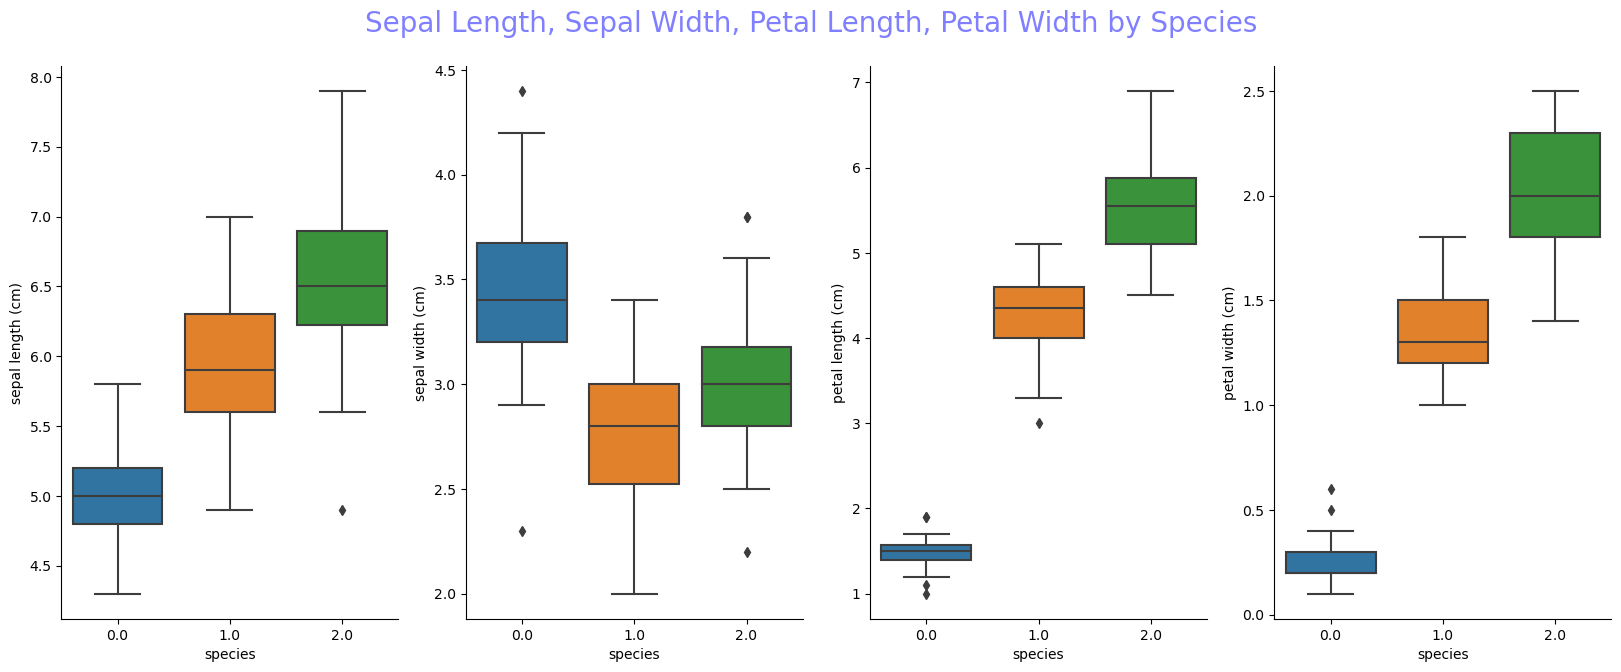

In [12]:
figure,axes = plt.subplots(1,4,figsize = (20,7))
sns.boxplot(data = df, x = 'species', y = 'sepal length (cm)',ax=axes[0])
sns.boxplot(data = df, x = 'species', y = 'sepal width (cm)',ax=axes[1])
sns.boxplot(data = df, x = 'species', y = 'petal length (cm)',ax=axes[2])
sns.boxplot(data = df, x = 'species', y = 'petal width (cm)',ax=axes[3])
sns.despine()
plt.subplots_adjust(top=0.9)
plt.suptitle('Sepal Length, Sepal Width, Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
plt.show()

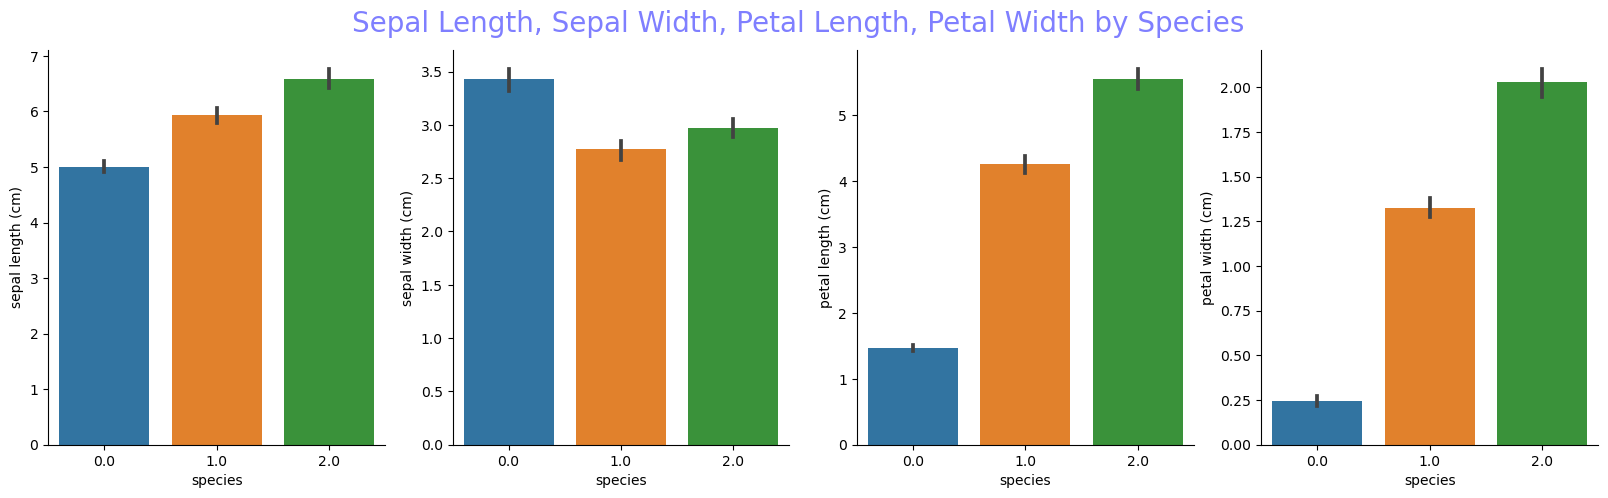

In [13]:
figure,axes = plt.subplots(1,4,figsize = (20,5))
sns.barplot(data = df, x = 'species', y = 'sepal length (cm)',ax=axes[0])
sns.barplot(data = df, x = 'species', y = 'sepal width (cm)',ax=axes[1])
sns.barplot(data = df, x = 'species', y = 'petal length (cm)',ax=axes[2])
sns.barplot(data = df, x = 'species', y = 'petal width (cm)',ax=axes[3])
sns.despine()
plt.subplots_adjust(top=0.9)
plt.suptitle('Sepal Length, Sepal Width, Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
plt.show()

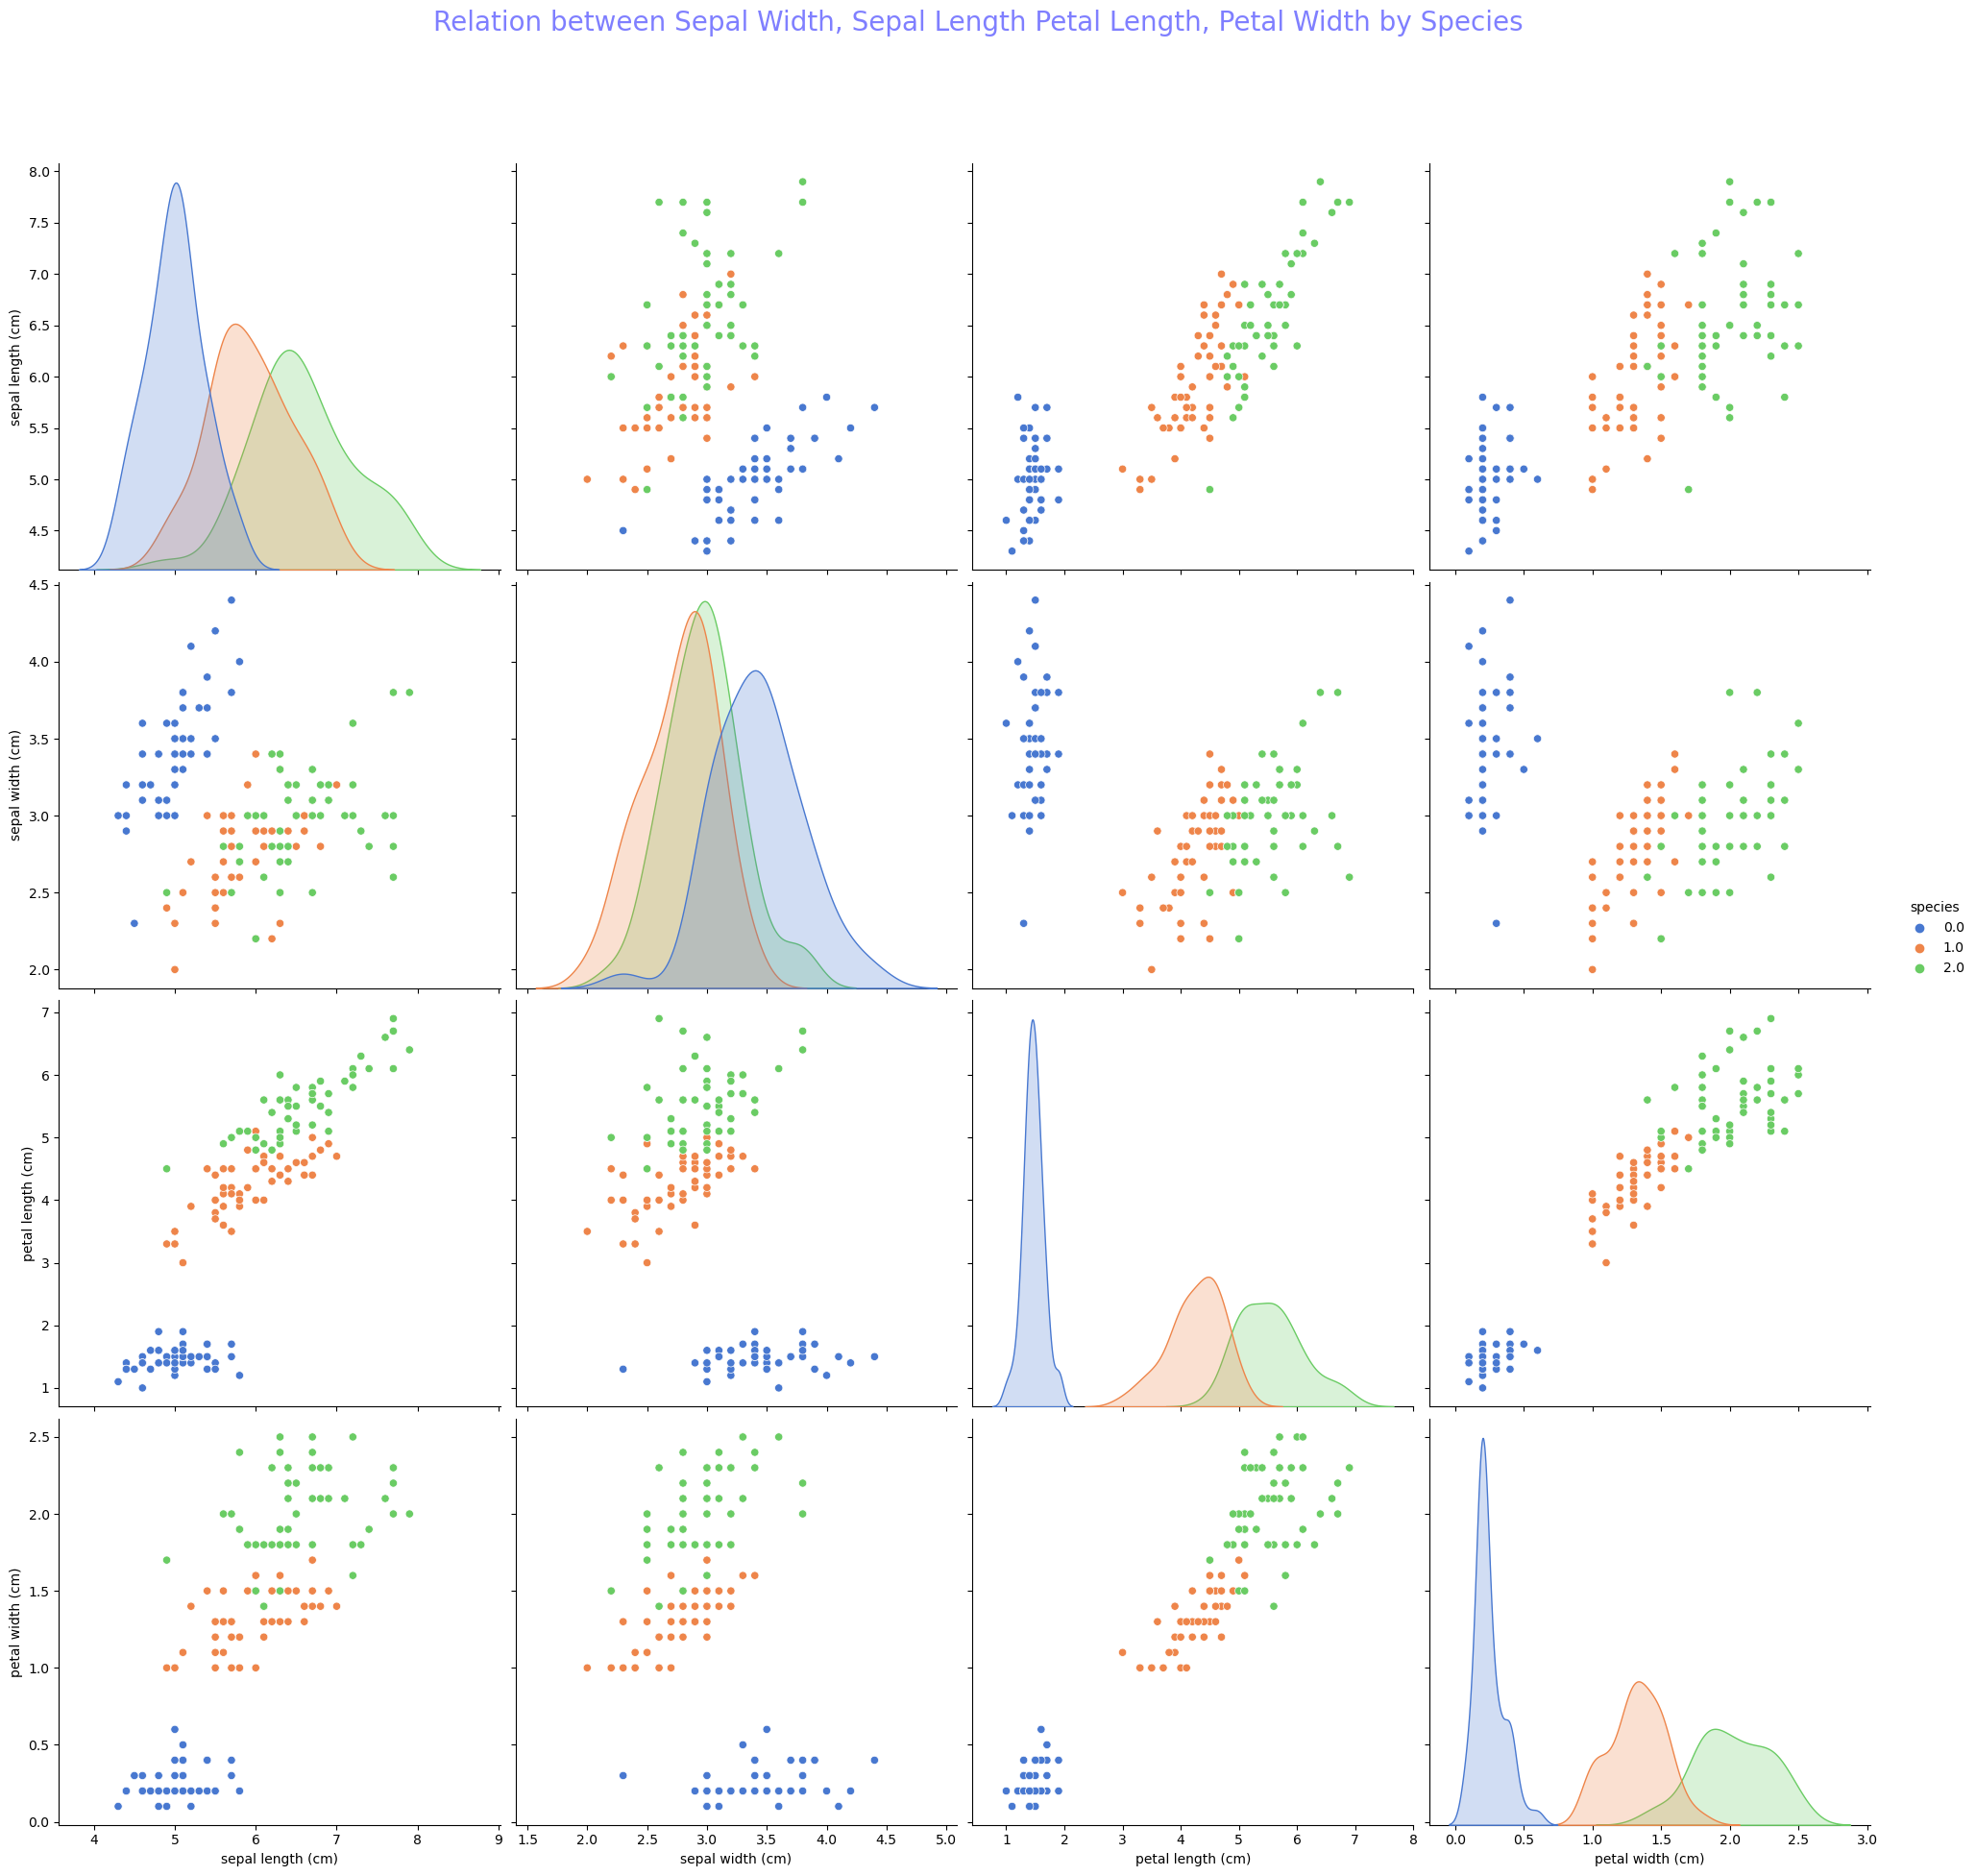

In [14]:
#create a pairplot(plot across different attributes)
sns.pairplot(df,hue='species',palette="muted",height=5,vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], kind='scatter')
sns.despine()
plt.subplots_adjust(top=0.9)
plt.suptitle('Relation between Sepal Width, Sepal Length Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
plt.show()

### Correlation Matrix

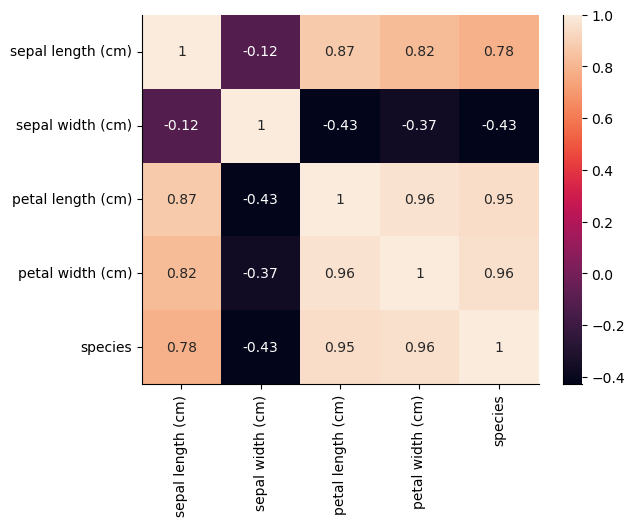

In [15]:
sns.heatmap(df.corr(), annot=True)
sns.despine()

###  Test normal distribution for hypothesis for Sepal Length and Sepal Width

In [16]:
from scipy import stats

In [17]:
alpha = 0.05
statistics, p = stats.shapiro(df['sepal length (cm)'])
print('Statistics=%.3f, p-value=%.3f' % (statistics, p))

if p < alpha:
    print('For Sepal Length reject the null hypothesis')
else:
    print('For Sepal Length cccept the null hypothesis')


Statistics=0.976, p-value=0.010
For Sepal Length reject the null hypothesis


In [18]:
alpha = 0.05
statistics, p = stats.shapiro(df['sepal width (cm)'])
print('Statistics=%.3f, p-value=%.3f' % (statistics, p))

if p < alpha:
    print('For Sepal Width reject the null hypothesis')
else:
    print('FOr Sepal WIdth accept the null hypothesis')

Statistics=0.985, p-value=0.101
FOr Sepal WIdth accept the null hypothesis


### Group by target groups and check statistics

In [46]:
df.groupby('species').agg(['mean','var', 'min','max'])

sepal length (cm)                     sepal width (cm)                 \
                     mean       var  min  max             mean       var  min   
species                                                                         
0.0                 5.006  0.124249  4.3  5.8            3.428  0.143690  2.3   
1.0                 5.936  0.266433  4.9  7.0            2.770  0.098469  2.0   
2.0                 6.588  0.404343  4.9  7.9            2.974  0.104004  2.2   

             petal length (cm)                     petal width (cm)            \
         max              mean       var  min  max             mean       var   
species                                                                         
0.0      4.4             1.462  0.030159  1.0  1.9            0.246  0.011106   
1.0      3.4             4.260  0.220816  3.0  5.1            1.326  0.039106   
2.0      3.8             5.552  0.304588  4.5  6.9            2.026  0.075433   

                   
         min  max  
species            
0.0      0.1  0.6  
1.0      1.0  1.8  
2.0      1.4  2.5

In [48]:
range_by_species = df.groupby(['species']).agg(np.ptp)
range_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0.0,1.5,2.1,0.9,0.5
1.0,2.1,1.4,2.1,0.8
2.0,3.0,1.6,2.4,1.1


### Write a function to automate EDA

In [86]:
def automated_EDA(df):
    
    range_ = {}
    for col in df:
        range_[col] = df[col].max() - df[col].min() 
    pd.Series(range_)
    stat1 = df.agg(['mean','var', 'min','max'])
    print(f'Range for each feature')
    print(range_)

    print(f'Mean, variance, min, max for each feature')
    print(stat1)
    
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle("Features' Distribution",fontsize=20,color='b',alpha=0.5)
    sns.histplot(ax=axs[0, 0], data=df, x='sepal length (cm)')
    sns.histplot(ax=axs[0, 1], data=df, x='sepal width (cm)')
    sns.histplot(ax=axs[1, 0], data=df, x='petal length (cm)')
    sns.histplot(ax=axs[1, 1], data=df, x='petal width (cm)')
    sns.despine()
    plt.show()
    
    figure,axes = plt.subplots(1,4,figsize = (20,7))
    sns.boxplot(data = df, x = 'species', y = 'sepal length (cm)',ax=axes[0])
    sns.boxplot(data = df, x = 'species', y = 'sepal width (cm)',ax=axes[1])
    sns.boxplot(data = df, x = 'species', y = 'petal length (cm)',ax=axes[2])
    sns.boxplot(data = df, x = 'species', y = 'petal width (cm)',ax=axes[3])
    sns.despine()
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Sepal Length, Sepal Width, Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
    plt.show()
    
    figure,axes = plt.subplots(1,4,figsize = (20,5))
    sns.barplot(data = df, x = 'species', y = 'sepal length (cm)',ax=axes[0])
    sns.barplot(data = df, x = 'species', y = 'sepal width (cm)',ax=axes[1])
    sns.barplot(data = df, x = 'species', y = 'petal length (cm)',ax=axes[2])
    sns.barplot(data = df, x = 'species', y = 'petal width (cm)',ax=axes[3])
    sns.despine()
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Sepal Length, Sepal Width, Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
    plt.show()
    
    sns.pairplot(df,hue='species',palette="muted",height=5,vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], kind='scatter')
    sns.despine()
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Relation between Sepal Width, Sepal Length Petal Length, Petal Width by Species',fontsize=20,color='b',alpha=0.5)
    plt.show()
    
    sns.heatmap(df.corr(), annot=True)
    sns.despine()
    
    stat_by_species = df.groupby('species').agg(['mean','var', 'min','max'])
    print(f' Mean, variance, min, max by species ')
    print(stat_by_species)
    range_by_species = df.groupby(['species']).agg(np.ptp)
    print(f'Range by species') 
    print(range_by_species)
    
    alpha = 0.05
    statistics, p = stats.shapiro(df['sepal length (cm)'])
    print('Statistics=%.3f, p-value=%.3f' % (statistics, p))

    if p < alpha:
        print('For Sepal Length reject the null hypothesis')
    else:
        print('For Sepal Length cccept the null hypothesis')
    
    statistics, p = stats.shapiro(df['sepal width (cm)'])
    print('Statistics=%.3f, p-value=%.3f' % (statistics, p))

    if p < alpha:
        print('For Sepal Width reject the null hypothesis')
    else:
        print('FOr Sepal WIdth accept the null hypothesis')
  


In [88]:
# automated_EDA(df)

### Conclusions